<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.2596
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1029
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0709
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132
Epoch 16/20
31/3

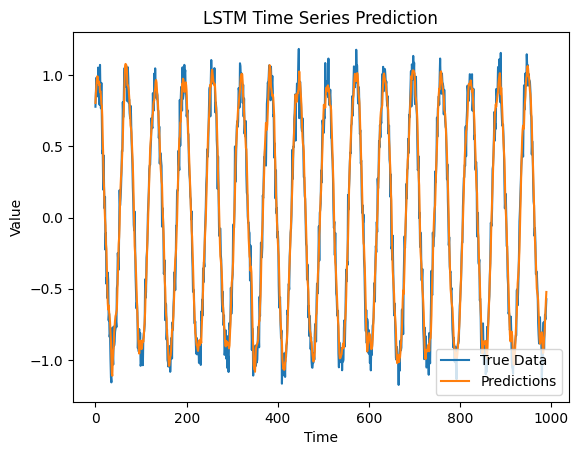

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 임의의 시계열 데이터 생성
np.random.seed(7)
time_steps = np.linspace(0, 100, num=1000)
data = np.sin(time_steps) + 0.1 * np.random.normal(size=len(time_steps))

# 데이터를 학습용 입력과 출력으로 변환
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(data, look_back)

# LSTM에 맞게 데이터 형태 변환 (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X, Y, epochs=20, batch_size=32, verbose=1)

# 예측
predictions = model.predict(X)

# 결과 시각화
plt.plot(data[look_back:], label="True Data")
plt.plot(predictions, label="Predictions")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Time Series Prediction')
plt.legend()
plt.show()